In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from nn.svm2 import SVM, linear_kernel, polynomial_kernel, gaussian_kernel
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import pylab as pl

In [2]:
data = np.loadtxt('data/dados-ex5.txt', delimiter=',')

In [3]:
X = data[:, :2]
Y = data[:, 2].astype('float')

In [4]:
Y.shape

(900,)

In [5]:
# plt.scatter(X[:, 0], X[:, 1], c=Y)

In [16]:
svm = SVM(kernel=polynomial_kernel, C=10)

In [17]:
trainX, testX, trainY, testY = train_test_split(X, Y, train_size=.8, test_size=.2, random_state=42)

In [18]:
svm.fit(X, Y)

     pcost       dcost       gap    pres   dres
 0: -2.4750e+03 -3.3750e+04  4e+04  1e-01  2e-15
 1: -2.7588e+03 -5.0124e+03  3e+03  7e-03  1e-15
 2: -4.4832e+03 -4.6548e+03  2e+02  3e-04  2e-15
 3: -4.4998e+03 -4.5016e+03  2e+00  3e-06  2e-15
 4: -4.5000e+03 -4.5000e+03  2e-02  3e-08  1e-15
 5: -4.5000e+03 -4.5000e+03  2e-04  3e-10  2e-15
Optimal solution found.
450 support vectors out of 900 points
0.0


In [19]:
y_pred = svm.predict(testX)

In [20]:
correct = np.sum(y_pred == testY)

In [21]:
correct/len(testY)

0.5444444444444444

In [22]:
clf = SVM(C=1000.1)
clf.fit(trainX, trainY)

y_predict = clf.predict(testX)
correct = np.sum(y_predict == testY)
print("%d out of %d predictions correct" % (correct, len(y_predict)))


     pcost       dcost       gap    pres   dres
 0: -1.7619e+05 -1.7693e+08  2e+08  1e-03  4e-13
 1: -1.7654e+05 -2.1182e+06  2e+06  2e-05  1e-13
 2: -2.0568e+05 -3.7026e+05  2e+05  1e-06  2e-13
 3: -3.5057e+05 -3.6529e+05  1e+04  6e-08  4e-12
 4: -3.5202e+05 -3.5217e+05  1e+02  6e-10  1e-12
 5: -3.5204e+05 -3.5204e+05  1e+00  6e-12  1e-12
 6: -3.5204e+05 -3.5204e+05  1e-02  6e-14  1e-12
Optimal solution found.
352 support vectors out of 720 points
0.0
98 out of 180 predictions correct


In [13]:
def plot_contour(X1_train, X2_train, clf):
    plt.plot(X1_train[:,0], X1_train[:,1], "ro")
    plt.plot(X2_train[:,0], X2_train[:,1], "bo")
    plt.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")
    
    xx, yy = torch.meshgrid([torch.arange(-1.6, 2.6, 0.1), torch.arange(-1.2, 2.6, 0.1)])
    X = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    Z = clf.project(X).reshape(xx.shape)
    print(Z == 0)
#     X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
#     Z = clf.project(X).reshape(X1.shape)
#     plt.contourf(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
#     plt.contourf(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
#     plt.contourf(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

#     plt.axis("tight")
#     plt.show()


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


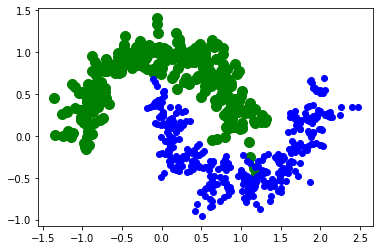

In [14]:
plot_contour(trainX[trainY == -1], trainX[trainY == 1], clf)

In [15]:
print(svm.sv_y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.